In [1]:
# reload scripts
try:
    os.chdir(ROOT_DIR)
except:
    pass
%run moment_calculation.py
%run dataset.py
%run summary_portfolio_stats.py
%run coronavirus_data.py
plt.style.use('ggplot')
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In this notebook, we explore the impact of widespread Robinhood trading on the macroscopic level. We focus on daily data, and study whether trading activity on Robinhood has some impact on market features. We focus especially on the  implications of Robinhood trading in terms of financial risk management.

# Exploration on the stock level

## Get all the Robinhood stock trading data available

### Getting the names of the stocks that are available on Robinhood's database

In [2]:
tickers = get_available_tickers()

In [3]:
print("We have data for a total of {} different stocks.".format(len(tickers)))

We have data for a total of 8597 different stocks.


### Making a dataset with end of day Robinhood user data for these stocks 

For the study of macroscopic effect, we will focus on end of day number of users who own any particular stock.

In [4]:
robinhood_popularity = merged_daily_usage_data(tickers)

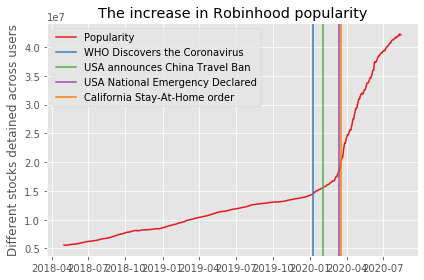

In [5]:
robinhood_popularity.sum(axis=1).plot(label='Popularity', c=cmap(0))
plt.title("The increase in Robinhood popularity")
plt.ylabel("Different stocks detained across users")
for (event, date), col in zip(EVENTS.items(), range(1, 5)):
    plt.axvline(x=date, label=event, c=cmap(col))
plt.legend()
plt.tight_layout()

We can see that the true trigger of the increase in the number of Robinhood users is the stay-at-home order. It seems people started trading massively after they had to stay at home. 

### Overview of stock that are most traded on Robinhood

Here are the most popular stocks at the beginning and at the end of the observation period (by number of users who own them).

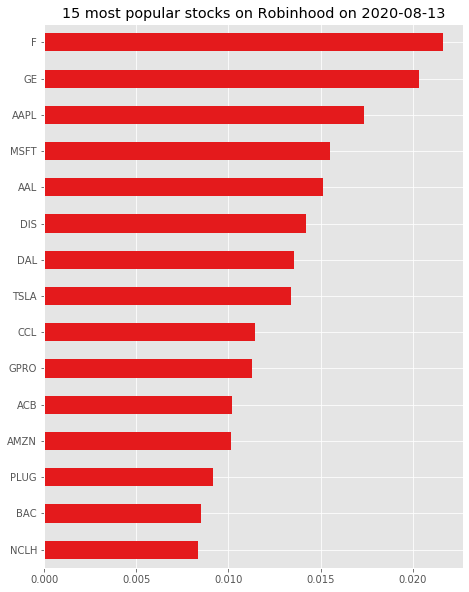

In [6]:
most_popular_end = most_popular_stocks(robinhood_popularity)

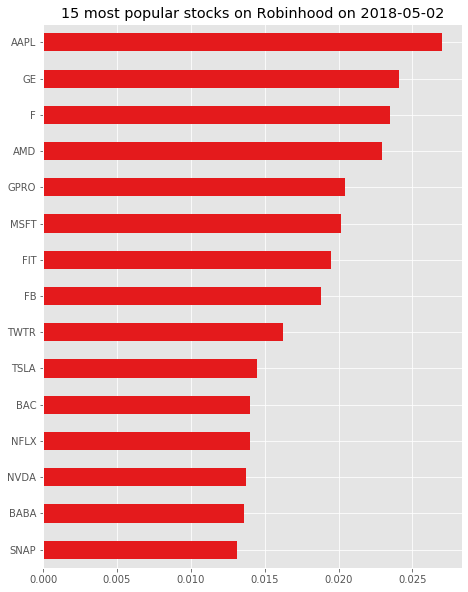

In [7]:
most_popular_start = most_popular_stocks(robinhood_popularity, date=robinhood_popularity.index[0])

## Volatility patterns of individual stocks

### Visual exploration - Stock prices history for most popular stocks on Robinhood

Let us first plot return series for the 15 most popular stocks on Robinhood (as of the start of the dataset), as well as the level of popularity for these, and see whether we can find some patterns.

In [8]:
fifteen_most_popular = most_popular_start.keys()[:15].tolist()
get_price_data(tickers=fifteen_most_popular)

AAPL
Already have AAPL
GE
Already have GE
F
Already have F
AMD
Already have AMD
GPRO
Already have GPRO
MSFT
Already have MSFT
FIT
Already have FIT
FB
Already have FB
TWTR
Already have TWTR
TSLA
Already have TSLA
BAC
Already have BAC
NFLX
Already have NFLX
NVDA
Already have NVDA
BABA
Already have BABA
SNAP
Already have SNAP


In [9]:
most_popular_prices = compile_price_data(tickers=fifteen_most_popular, title_ext='most_popular')
most_popular_ret = get_returns(most_popular_prices)

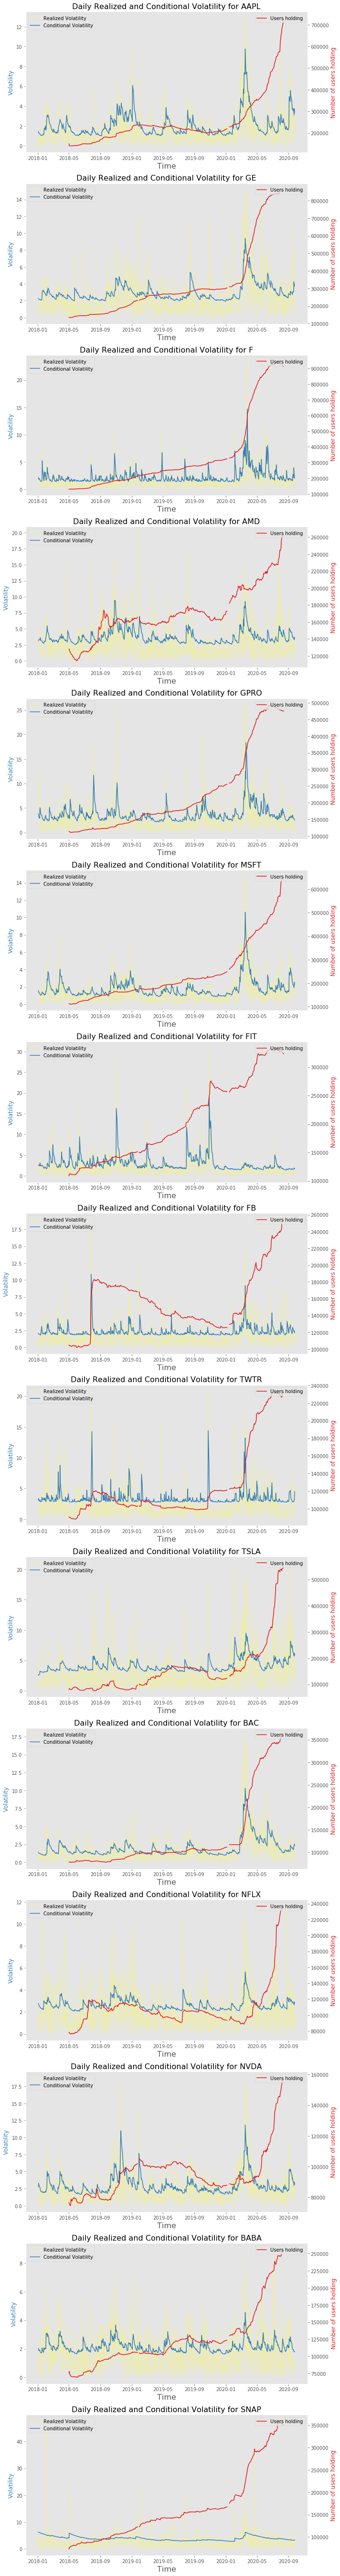

In [10]:
plot_vol(return_df=most_popular_ret, popularity_df=robinhood_popularity[fifteen_most_popular])

### Get stocks prices for some very unpopular stocks on Robinhood

Now, we are looking at the patterns in 15 east popular stocks on Robinhood, as of the start of the dataset.

In [11]:
fifteen_least_popular_start = most_popular_start[-15:].keys().tolist()
get_price_data(tickers=fifteen_least_popular_start)

USLB
Already have USLB
CLTL
Already have CLTL
STPP
Already have STPP
INDU
Already have INDU
DTYL
Already have DTYL
PPTY
Already have PPTY
EFU
Already have EFU
NIQ
Already have NIQ
FLCO
Already have FLCO
FAB
Already have FAB
HVT
Already have HVT
UCHF
Already have UCHF
EVLMC
Already have EVLMC
FCBP
Already have FCBP
FLMB
Already have FLMB


In [12]:
least_popular_prices = compile_price_data(tickers=fifteen_least_popular_start, title_ext='least_popular')
least_popular_ret = get_returns(least_popular_prices)

In [13]:
path="aggregated_daily_data/"
title_ext='least_popular'
file_name = path + 'joined_closes' + title_ext + '.csv'

/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001013. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/opt/anaconda3/lib/python3.7/site-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03978. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale)

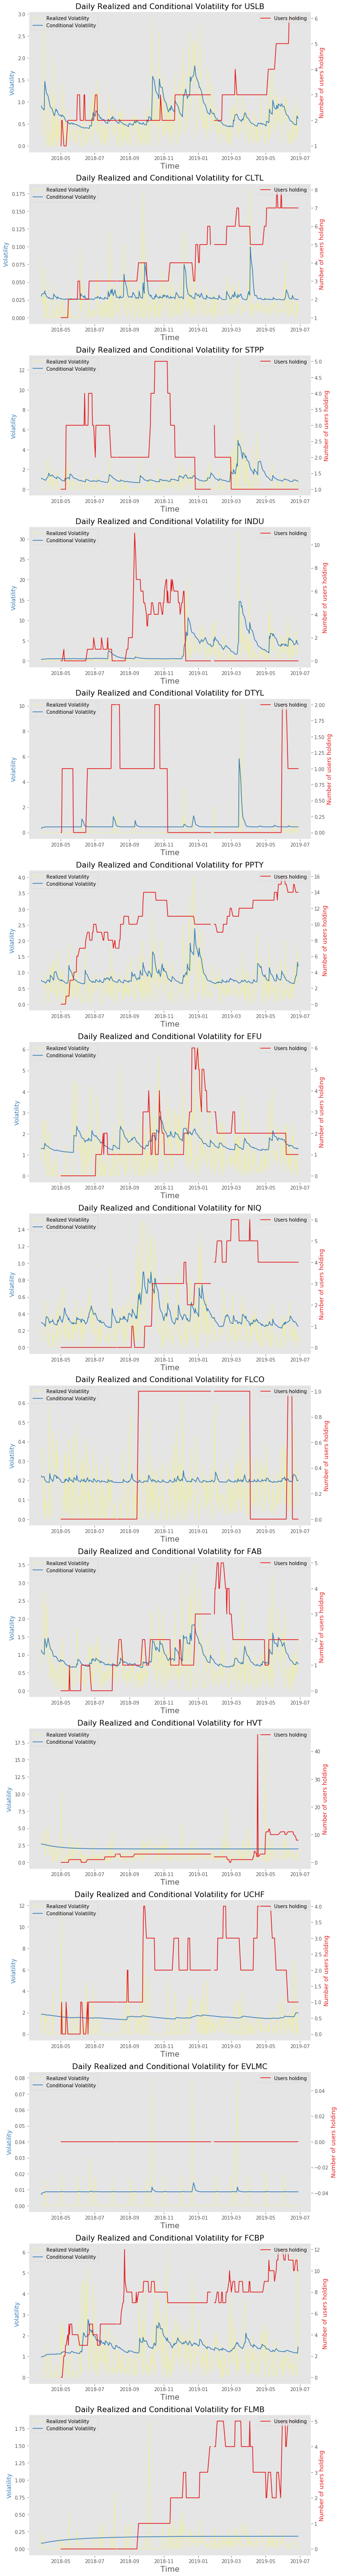

In [14]:
plot_vol(return_df=least_popular_ret, popularity_df=robinhood_popularity[fifteen_least_popular_start])

## Get price data corresponding to the stocks held by Robinhood users

Let us first get price data for all the stocks listed on Robinhood.

In [70]:
get_price_data(tickers=robinhood_popularity.columns.tolist())

RIV
Already have RIV
ANTE
Already have ANTE
CSCO
Already have CSCO
PRI
Already have PRI
SLIM
Already have SLIM
BIOS
Error for BIOS: No data fetched for symbol BIOS using YahooDailyReader.
NZF
Already have NZF
CSUAY
Already have CSUAY
HLNE
Already have HLNE
MQBKY
Already have MQBKY
UNT
Already have UNT
SPXB
Already have SPXB
HUBS
Already have HUBS
GPL
Already have GPL
PSM
Already have PSM
ZURVY
Already have ZURVY
SBGI
Already have SBGI
UFCS
Already have UFCS
TEAF
Already have TEAF
PWCDF
Already have PWCDF
RJZ
Already have RJZ
GFED
Already have GFED
AIRT
Already have AIRT
SITC
Already have SITC
NXN
Already have NXN
BNY
Already have BNY
SPXU
Already have SPXU
PPA
Already have PPA
RHE
Already have RHE
ISSC
Already have ISSC
KNDI
Already have KNDI
EFT
Already have EFT
USTB
Already have USTB
TRNS
Already have TRNS
XOXO
Already have XOXO
XSHD
Already have XSHD
BBSA
Already have BBSA
BCI
Already have BCI
CARO
Already have CARO
BBRE
Already have BBRE
AEIS
Already have AEIS
UAL
Already have UAL


Error for WCG: No data fetched for symbol WCG using YahooDailyReader.
CTRA
Already have CTRA
SWKS
Already have SWKS
USOI
Already have USOI
CHAQ
Already have CHAQ
FRPT
Already have FRPT
ALYA
Already have ALYA
ZGNX
Already have ZGNX
RCKT
Already have RCKT
UCHF
Already have UCHF
WBT
Already have WBT
KRMA
Already have KRMA
SPMB
Already have SPMB
TBPH
Already have TBPH
UCIB
Already have UCIB
NMY
Already have NMY
PPSI
Already have PPSI
MFNC
Already have MFNC
GEL
Already have GEL
IHD
Already have IHD
FRSX
Already have FRSX
LPTH
Already have LPTH
PFM
Already have PFM
VCTR
Already have VCTR
FIEU
Already have FIEU
USAU
Already have USAU
LEAF
Already have LEAF
PREF
Already have PREF
ENPH
Already have ENPH
NCR
Already have NCR
JHMI
Already have JHMI
ITCI
Already have ITCI
KRBN
Already have KRBN
GMOM
Already have GMOM
HWCC
Already have HWCC
BWZ
Already have BWZ
BTA
Already have BTA
KNSA
Already have KNSA
BEAT
Already have BEAT
GIX
Already have GIX
MHLD
Already have MHLD
WBAL
Already have WBAL
IEC
A

Error for BHACU: No data fetched for symbol BHACU using YahooDailyReader.
ATEN
Already have ATEN
ITOCY
Already have ITOCY
SNP
Already have SNP
RYLD
Already have RYLD
STAF
Already have STAF
CEFL
Already have CEFL
LJPC
Already have LJPC
NWGI
Already have NWGI
DON
Already have DON
CIH
Already have CIH
ARW
Already have ARW
CLNY
Already have CLNY
PAGS
Already have PAGS
VIVE
Already have VIVE
VRM
Already have VRM
HCFT
Already have HCFT
SYY
Already have SYY
GENC
Already have GENC
BCOM
Already have BCOM
CLXT
Already have CLXT
CG
Already have CG
SDRL
Already have SDRL
CYAN
Already have CYAN
GLDI
Already have GLDI
HCRF
Already have HCRF
MSI
Already have MSI
BC
Already have BC
RTOKY
Already have RTOKY
CNAT
Already have CNAT
CBTX
Already have CBTX
AX
Already have AX
FCX
Already have FCX
HNP
Already have HNP
WASH
Already have WASH
IMBBY
Already have IMBBY
HLX
Already have HLX
FBK
Already have FBK
SYN
Already have SYN
RWUI
Already have RWUI
B
Already have B
ESIO
Already have ESIO
PARR
Already have P

Error for MDR: No data fetched for symbol MDR using YahooDailyReader.
ARE
Already have ARE
VC
Already have VC
CIZ
Already have CIZ
MGI
Already have MGI
MEDS
Already have MEDS
FTC
Already have FTC
SMLF
Already have SMLF
JBT
Already have JBT
AAGIY
Already have AAGIY
FSBW
Already have FSBW
THRM
Already have THRM
MRGR
Already have MRGR
CYCC
Already have CYCC
G
Already have G
VGI
Already have VGI
NEON
Already have NEON
AGS
Already have AGS
SYK
Already have SYK
OMRNY
Already have OMRNY
QCP
Already have QCP
HMY
Already have HMY
AEL
Already have AEL
AQMS
Already have AQMS
BOXL
Already have BOXL
IBHE
Already have IBHE
PASS
Already have PASS
CB
Already have CB
AGD
Already have AGD
OSUR
Already have OSUR
VDE
Already have VDE
HCSG
Already have HCSG
P
Already have P
ACRX
Already have ACRX
PDLB
Already have PDLB
BSJO
Already have BSJO
SOAC
Already have SOAC
CIFS
Already have CIFS
AXGN
Already have AXGN
FAB
Already have FAB
HMN
Already have HMN
FDUS
Already have FDUS
VEA
Already have VEA
ESHY
Already

Error for SCNB: 'Date'.
ADDYY
Already have ADDYY
TCEHY
Already have TCEHY
MHE
Already have MHE
CEM
Already have CEM
TAWK
Already have TAWK
HTHT
Already have HTHT
TTDKY
Already have TTDKY
TDS
Already have TDS
TGH
Already have TGH
ESRT
Already have ESRT
STLG
Already have STLG
PFLT
Already have PFLT
SAN
Already have SAN
NBRV
Already have NBRV
CPSS
Already have CPSS
DBO
Already have DBO
IRTC
Already have IRTC
WTRE
Already have WTRE
HWC
Already have HWC
NBSE
Already have NBSE
MRKR
Already have MRKR
ATHX
Already have ATHX
FXC
Already have FXC
DGRS
Already have DGRS
IUSV
Already have IUSV
CEZ
Already have CEZ
AQUA
Already have AQUA
CLBK
Already have CLBK
CFA
Already have CFA
FAST
Already have FAST
XSW
Already have XSW
DRIV
Already have DRIV
XPL
Already have XPL
MLAB
Already have MLAB
ORI
Already have ORI
EDRY
Already have EDRY
LDSF
Already have LDSF
DAC
Already have DAC
GRVY
Already have GRVY
DBX
Already have DBX
GRUB
Already have GRUB
OMEX
Already have OMEX
STOK
Already have STOK
QEMM
Alread

Error for INNL: 'Date'.
RILY
Already have RILY
TMHC
Already have TMHC
ATCO
Already have ATCO
STFC
Already have STFC
AAXJ
Already have AAXJ
IGEB
Already have IGEB
QQQ
Already have QQQ
IIIN
Already have IIIN
SMIN
Already have SMIN
CLR
Already have CLR
ATV
Already have ATV
RINF
Already have RINF
HMNF
Already have HMNF
TLH
Already have TLH
EQBK
Already have EQBK
LEN.B
Error for LEN.B: 'Date'.
MNSB
Already have MNSB
OXM
Already have OXM
MCR
Already have MCR
CMA
Already have CMA
GNOM
Already have GNOM
CYRN
Already have CYRN
GLTR
Already have GLTR
QSY
Already have QSY
FDEM
Already have FDEM
ATCX
Already have ATCX
FPX
Already have FPX
IPGP
Already have IPGP
FRG
Already have FRG
PFGC
Already have PFGC
VIPS
Already have VIPS
PXLW
Already have PXLW
PG
Already have PG
CNSP
Already have CNSP
CLFD
Already have CLFD
SDOG
Already have SDOG
TAO
Already have TAO
TBT
Already have TBT
IBTX
Already have IBTX
BSTZ
Already have BSTZ
DGS
Already have DGS
MGTX
Already have MGTX
MIXT
Already have MIXT
SCHE
Alre

Error for PAH: 'Date'.
DXCM
Already have DXCM
EZM
Already have EZM
RMCF
Already have RMCF
PROS
Already have PROS
TERP
Already have TERP
BBOX
Already have BBOX
DSPG
Already have DSPG
LUMO
Already have LUMO
VFLQ
Already have VFLQ
LPG
Already have LPG
JDST
Already have JDST
NKX
Already have NKX
BLCT
Already have BLCT
COBZ
Already have COBZ
VSTO
Already have VSTO
NHC
Already have NHC
EXR
Already have EXR
CHGG
Already have CHGG
HIBB
Already have HIBB
KWR
Already have KWR
GDNA
Already have GDNA
PBD
Already have PBD
XFLT
Already have XFLT
GASX
Already have GASX
FNDA
Already have FNDA
WELL
Already have WELL
FNGZ
Already have FNGZ
HYEM
Already have HYEM
HEWY
Already have HEWY
BRKL
Already have BRKL
INR
Already have INR
HRTX
Already have HRTX
DRQ
Already have DRQ
GREK
Already have GREK
TTM
Already have TTM
GLMD
Already have GLMD
KN
Already have KN
NRGO
Already have NRGO
LOPE
Already have LOPE
MLPO
Already have MLPO
IQ
Already have IQ
CLRB
Already have CLRB
ZAGG
Already have ZAGG
VMM
Already have

Error for _OUT: No data fetched for symbol _OUT using YahooDailyReader.
SPEM
Already have SPEM
WHD
Already have WHD
OKTA
Already have OKTA
DXLG
Already have DXLG
SYNC
Already have SYNC
CHII
Already have CHII
BIPC
Already have BIPC
EWX
Already have EWX
GLG
Already have GLG
FLQG
Already have FLQG
AKTS
Already have AKTS
CVCY
Already have CVCY
CACC
Already have CACC
ARYA
Already have ARYA
ITGR
Already have ITGR
OPCH
Already have OPCH
USL
Already have USL
UPW
Already have UPW
NEA
Already have NEA
UCBA
Already have UCBA
BSV
Already have BSV
NTES
Already have NTES
EVK
Already have EVK
ELMD
Already have ELMD
DVAX
Already have DVAX
SYNT
Already have SYNT
XMPT
Already have XMPT
FINV
Already have FINV
FEYE
Already have FEYE
PDYPY
Already have PDYPY
RTN
Already have RTN
PEBK
Already have PEBK
EWO
Already have EWO
CFFI
Already have CFFI
UDEC
Already have UDEC
GLP
Already have GLP
PBDM
Already have PBDM
WIW
Already have WIW
KRKR
Already have KRKR
NIU
Already have NIU
WRLS
Already have WRLS
GTHX
Alre

Error for PNRL: No data fetched for symbol PNRL using YahooDailyReader.
GOSS
Already have GOSS
LYTS
Already have LYTS
OILD
Already have OILD
NEW
Already have NEW
KBAL
Already have KBAL
NXPI
Already have NXPI
LIQT
Already have LIQT
CHIH
Already have CHIH
PMX
Already have PMX
MRWSY
Already have MRWSY
PNC
Already have PNC
TBNK
Already have TBNK
ARMR
Already have ARMR
NPA
Already have NPA
VTIP
Already have VTIP
KMX
Already have KMX
NAII
Already have NAII
FELE
Already have FELE
PPLN
Already have PPLN
EAT
Already have EAT
IWC
Already have IWC
WRTC
Already have WRTC
BGR
Already have BGR
TBLT
Already have TBLT
YRD
Already have YRD
NFLT
Already have NFLT
NSM
Already have NSM
NPV
Already have NPV
GXC
Already have GXC
DMAY
Already have DMAY
BEST
Already have BEST
PRVB
Already have PRVB
SLAB
Already have SLAB
BGIO
Already have BGIO
KOP
Already have KOP
RBB
Already have RBB
FBIO
Already have FBIO
EGIF
Already have EGIF
CMCO
Already have CMCO
SEDG
Already have SEDG
WRK
Already have WRK
RLI
Already h

Error for ATTU: No data fetched for symbol ATTU using YahooDailyReader.
FDN
Already have FDN
MRVL
Already have MRVL
FFHL
Already have FFHL
UPWK
Already have UPWK
PSHG
Already have PSHG
IBMI
Already have IBMI
VIGI
Already have VIGI
XLV
Already have XLV
TZA
Already have TZA
ZTR
Already have ZTR
XOM
Already have XOM
RBCAA
Already have RBCAA
EB
Already have EB
RENX
Already have RENX
EDOG
Already have EDOG
BACHY
Already have BACHY
MTH
Already have MTH
FGB
Already have FGB
IGRO
Already have IGRO
SRL
Already have SRL
DRV
Already have DRV
AVAV
Already have AVAV
NUAN
Already have NUAN
UIVM
Already have UIVM
HR
Already have HR
ALT
Already have ALT
CWK
Already have CWK
POTX
Already have POTX
FONR
Already have FONR
VNQ
Already have VNQ
AMP
Already have AMP
OCC
Already have OCC
MLSS
Already have MLSS
CUT
Already have CUT
BDCZ
Already have BDCZ
EXPC
Already have EXPC
HDV
Already have HDV
IRDM
Already have IRDM
QID
Already have QID
DWFI
Already have DWFI
NBAC
Already have NBAC
INTF
Already have INTF


Error for BH.A: No data fetched for symbol BH.A using YahooDailyReader.
CXH
Already have CXH
GLOP
Already have GLOP
EXPO
Already have EXPO
BSCL
Already have BSCL
SSD
Already have SSD
HEI
Already have HEI
HGV
Already have HGV
NLOK
Already have NLOK
IBBJ
Already have IBBJ
ESBA
Already have ESBA
MYT
Already have MYT
ALX
Already have ALX
NRGD
Already have NRGD
KE
Already have KE
GLOG
Already have GLOG
HOLD
Already have HOLD
GNTX
Already have GNTX
ESCR
Already have ESCR
CUO
Already have CUO
REAL
Already have REAL
TOKE
Already have TOKE
AMK
Already have AMK
FTXD
Already have FTXD
OCX
Already have OCX
VUZI
Already have VUZI
DSI
Already have DSI
PDEV
Already have PDEV
SPH
Already have SPH
MILN
Already have MILN
DLPH
Already have DLPH
CTK
Already have CTK
KR
Already have KR
MYC
Already have MYC
ALO
Error for ALO: No data fetched for symbol ALO using YahooDailyReader.
HI
Already have HI
RECS
Already have RECS
VLU
Already have VLU
SQBG
Already have SQBG
SPHS
Already have SPHS
VWAGY
Already have V

Error for MNI: No data fetched for symbol MNI using YahooDailyReader.
OSIS
Already have OSIS
CCA
Error for CCA: No data fetched for symbol CCA using YahooDailyReader.
OVM
Already have OVM
MOM
Already have MOM
LTPZ
Already have LTPZ
XTH
Already have XTH
SGB
Error for SGB: No data fetched for symbol SGB using YahooDailyReader.
MPWR
Already have MPWR
SDY
Already have SDY
STIP
Already have STIP
SCIJ
Already have SCIJ
JJP
Already have JJP
SAQN
Already have SAQN
DGX
Already have DGX
JHX
Already have JHX
TCHP
Already have TCHP
TMFC
Already have TMFC
CBIO
Already have CBIO
ASHR
Already have ASHR
NEPT
Already have NEPT
JPUS
Already have JPUS
WFHY
Already have WFHY
LVHI
Already have LVHI
ADIL
Already have ADIL
IBTD
Already have IBTD
FTLB
Already have FTLB
SHYL
Already have SHYL
CAI
Already have CAI
UNFI
Already have UNFI
HRC
Already have HRC
PQIN
Already have PQIN
JJG
Already have JJG
SGU
Already have SGU
EAGG
Already have EAGG
LMST
Already have LMST
CNSL
Already have CNSL
PVAC
Already have PVAC

Error for GLOW: No data fetched for symbol GLOW using YahooDailyReader.
INVE
Already have INVE
MLPC
Already have MLPC
FXNC
Already have FXNC
SAFT
Already have SAFT
LSAF
Already have LSAF
BSCK
Already have BSCK
SRG
Already have SRG
KB
Already have KB
AOD
Already have AOD
HY
Already have HY
DLAKY
Already have DLAKY
CVS
Already have CVS
DGAZ
Already have DGAZ
TAEQ
Already have TAEQ
VNM
Already have VNM
TUR
Already have TUR
WDFC
Already have WDFC
SAEX
Already have SAEX
RLJE
Already have RLJE
OVBC
Already have OVBC
SAGG
Already have SAGG
BSAC
Already have BSAC
TWM
Already have TWM
MYD
Already have MYD
CTL
Already have CTL
FVAC
Already have FVAC
AOS
Already have AOS
MTT
Already have MTT
OLP
Already have OLP
FE
Already have FE
ABC
Already have ABC
VIACA
Already have VIACA
NBLX
Already have NBLX
WOPEY
Already have WOPEY
SAIL
Already have SAIL
GRID
Already have GRID
JPM
Already have JPM
SCPL
Already have SCPL
DRTT
Already have DRTT
VERY
Already have VERY
JPMF
Already have JPMF
UBIO
Already have

Error for MTL-: No data fetched for symbol MTL- using YahooDailyReader.
AGTC
Already have AGTC
PBPB
Already have PBPB
ROBO
Already have ROBO
SLCA
Already have SLCA
TPSC
Already have TPSC
SUNS
Already have SUNS
PXE
Already have PXE
KPCPY
Already have KPCPY
GOOGL
Already have GOOGL
DAVA
Already have DAVA
EBS
Already have EBS
NTRP
Already have NTRP
GAIN
Already have GAIN
FLEH
Already have FLEH
RCM
Already have RCM
NTST
Already have NTST
OILX
Already have OILX
PBFX
Already have PBFX
PMD
Already have PMD
BRFS
Already have BRFS
LRGE
Already have LRGE
GNE
Already have GNE
EVA
Already have EVA
ZYNE
Already have ZYNE
BRX
Already have BRX
COMM
Already have COMM
BLNK
Already have BLNK
NFG
Already have NFG
LEDS
Already have LEDS
EVV
Already have EVV
CHIC
Already have CHIC
LEGH
Already have LEGH
EUM
Already have EUM
GNR
Already have GNR
POL
Already have POL
PLW
Already have PLW
IAE
Already have IAE
CACI
Already have CACI
BRO
Already have BRO
DNHBY
Already have DNHBY
PNRG
Already have PNRG
FLQM
Alre

Error for RTR: 'Date'.
AKTX
Already have AKTX
FLQL
Already have FLQL
BRN
Already have BRN
AINC
Already have AINC
SYNH
Already have SYNH
PMR
Already have PMR
PNI
Already have PNI
PKOH
Already have PKOH
SENEA
Already have SENEA
PRAA
Already have PRAA
SNOA
Already have SNOA
EWD
Already have EWD
BRY
Already have BRY
GTEC
Already have GTEC
PLIN
Already have PLIN
GBOOY
Already have GBOOY
ITEQ
Already have ITEQ
CMTL
Already have CMTL
ICL
Already have ICL
CHIU
Already have CHIU
PME
Already have PME
YPF
Already have YPF
FLFR
Already have FLFR
BFK
Already have BFK
LHX
Already have LHX
BEP
Already have BEP
CCOI
Already have CCOI
ORLY
Already have ORLY
MFSF
Already have MFSF
IVZ
Already have IVZ
CQQQ
Already have CQQQ
FENG
Already have FENG
DISCB
Already have DISCB
RCL
Already have RCL
PXS
Already have PXS
EBR
Already have EBR
APTO
Already have APTO
NRC
Already have NRC
UOCT
Already have UOCT
FLDM
Already have FLDM
UDN
Already have UDN
FLGV
Already have FLGV
ZYXI
Already have ZYXI
NPK
Already have

Error for ACHN: No data fetched for symbol ACHN using YahooDailyReader.
QGTA
Already have QGTA
TEL
Already have TEL
ADMS
Already have ADMS
CEV
Already have CEV
UNAM
Already have UNAM
MEN
Already have MEN
TD
Already have TD
APB
Already have APB
BXMX
Already have BXMX
CUBE
Already have CUBE
FVD
Already have FVD
HYS
Already have HYS
JBL
Already have JBL
CREG
Already have CREG
VIVO
Already have VIVO
FORD
Already have FORD
CIB
Already have CIB
VST
Already have VST
ILPT
Already have ILPT
JW.B
Error for JW.B: No data fetched for symbol JW.B using YahooDailyReader.
JKHY
Already have JKHY
TS
Already have TS
OSBC
Already have OSBC
WH
Already have WH
HSAQ
Already have HSAQ
RNLC
Already have RNLC
SOI
Already have SOI
HYD
Already have HYD
ECYT
Already have ECYT
MGF
Already have MGF
VRP
Already have VRP
FMIL
Already have FMIL
ADAP
Already have ADAP
VUSE
Already have VUSE
FAZ
Already have FAZ
MIDF
Already have MIDF
H
Already have H
JPHY
Already have JPHY
AE
Already have AE
SFTBY
Already have SFTBY
CE

Error for MRIC: No data fetched for symbol MRIC using YahooDailyReader.
NEWR
Already have NEWR
ORG
Already have ORG
KELYB
Already have KELYB
BANC
Already have BANC
CFO
Already have CFO
ZM
Already have ZM
CET
Already have CET
TEN
Already have TEN
ESPR
Already have ESPR
INFN
Already have INFN
AMED
Already have AMED
FSMB
Already have FSMB
SOXL
Already have SOXL
KDDIY
Already have KDDIY
STOR
Already have STOR
DBA
Already have DBA
HWM
Already have HWM
INDF
Already have INDF
PCRX
Already have PCRX
DPST
Already have DPST
XENT
Already have XENT
DRIO
Already have DRIO
INFY
Already have INFY
PAHC
Already have PAHC
CFX
Already have CFX
MHK
Already have MHK
FXZ
Already have FXZ
FDMO
Already have FDMO
IEUS
Already have IEUS
CLBS
Already have CLBS
FTHI
Already have FTHI
SFST
Already have SFST
TEX
Already have TEX
TFC
Already have TFC
STML
Already have STML
CPRX
Already have CPRX
IEUR
Already have IEUR
IPOS
Already have IPOS
JLS
Already have JLS
SAA
Already have SAA
BSRR
Already have BSRR
DWUS
Alread

Error for CWEN.A: No data fetched for symbol CWEN.A using YahooDailyReader.
DDMX
Already have DDMX
BURG
Already have BURG
FLBL
Already have FLBL
KYOCY
Already have KYOCY
GHSI
Already have GHSI
RRD
Already have RRD
RUSHA
Already have RUSHA
BITA
Already have BITA
ISDR
Already have ISDR
IGR
Already have IGR
BEAM
Already have BEAM
SLQD
Already have SLQD
TILT
Already have TILT
NBO
Already have NBO
MAGS
Already have MAGS
CMPR
Already have CMPR
NAT
Already have NAT
GOVT
Already have GOVT
AIIQ
Already have AIIQ
WMB
Already have WMB
HUYA
Already have HUYA
QVAL
Already have QVAL
IFV
Already have IFV
KLIC
Already have KLIC
OYLD
Already have OYLD
PKD
Already have PKD
XOMA
Already have XOMA
SYKE
Already have SYKE
EQR
Already have EQR
CHNG
Already have CHNG
AYLA
Already have AYLA
ERI
Already have ERI
IGE
Already have IGE
PNTG
Already have PNTG
MXIM
Already have MXIM
NAC
Already have NAC
UCFC
Already have UCFC
SILJ
Already have SILJ
BTO
Already have BTO
TLRA
Already have TLRA
LYG
Already have LYG
WKH

Error for EROC: 'Date'.
FUTU
Already have FUTU
MAIN
Already have MAIN
NLR
Already have NLR
IJT
Already have IJT
GSKY
Already have GSKY
KRP
Already have KRP
HIFS
Already have HIFS
PGF
Already have PGF
PEY
Already have PEY
GEC
Already have GEC
TEVA
Already have TEVA
APHA
Already have APHA
CCRC
Already have CCRC
SRVR
Already have SRVR
UUP
Already have UUP
WMT
Already have WMT
SINT
Already have SINT
GXTG
Already have GXTG
JHMF
Already have JHMF
SIMO
Already have SIMO
NTCO
Already have NTCO
LITE
Already have LITE
RPM
Already have RPM
PHI
Already have PHI
TPCO
Already have TPCO
RQI
Already have RQI
PETZC
Already have PETZC
RRR
Already have RRR
CHYHY
Already have CHYHY
PIM
Already have PIM
IGD
Already have IGD
ERH
Already have ERH
MDYG
Already have MDYG
NTAP
Already have NTAP
MFAC
Already have MFAC
EQS
Already have EQS
NBY
Already have NBY
SILK
Already have SILK
BTN
Already have BTN
SGBX
Already have SGBX
BLIN
Already have BLIN
HYND
Already have HYND
FLTW
Already have FLTW
AKRX
Already have A

Error for MKC.V: No data fetched for symbol MKC.V using YahooDailyReader.
BCS
Already have BCS
APPS
Already have APPS
UCI
Already have UCI
KRTX
Already have KRTX
FLAU
Already have FLAU
BAL
Already have BAL
DJCI
Already have DJCI
BBW
Already have BBW
RDVT
Already have RDVT
TELL
Already have TELL
RGP
Already have RGP
EURL
Already have EURL
RODM
Already have RODM
EEB
Already have EEB
REX
Already have REX
PLXS
Already have PLXS
YVR
Already have YVR
AKER
Already have AKER
JQUA
Already have JQUA
BCD
Already have BCD
NUS
Already have NUS
SIZE
Already have SIZE
NWL
Already have NWL
QTNT
Already have QTNT
UAA
Already have UAA
SPTL
Already have SPTL
PERY
Already have PERY
IHDG
Already have IHDG
KIN
Already have KIN
SBIO
Already have SBIO
EDF
Already have EDF
IQDE
Already have IQDE
KWEB
Already have KWEB
AKO.B
Error for AKO.B: No data fetched for symbol AKO.B using YahooDailyReader.
SRAX
Already have SRAX
NSRGY
Already have NSRGY
LAC
Already have LAC
ARGO
Already have ARGO
BLK
Already have BLK
BM

In [17]:
all_robinhood_prices = compile_price_data([t[:-4] for t in tickers], title_ext='all_robinhood_stocks')

## Data cleaning

### How much data we got to construct the portfolio

In [21]:
time_0_shares = robinhood_popularity.iloc[0, :].fillna(0)
total_shares = time_0_shares.sum()
missing_nb = 0
missing_shares = []
for i in range(len(time_0_shares)):
    ticker = time_0_shares.index[i]
    if (not ticker in all_robinhood_prices.index):
        missing += time_0_shares.iloc[i]
        missing_shares.append(ticker)
print("We have data for {} % of the shares.".format(100 - 100 * missing / total_shares))
print('The missing shares are {}.'.format(missing_shares))

BIOS is missing.
HVT.A is missing.
BRK.B is missing.
EACQ is missing.
WCG is missing.
BPMX is missing.
HLTH is missing.
HIIQ is missing.
NAO is missing.
BRK.A is missing.
BHACU is missing.
GGP is missing.
MOSC is missing.
MDR is missing.
YUMA is missing.
BWINA is missing.
SBGL is missing.
LLL is missing.
VMAX is missing.
SCNB is missing.
VLRX is missing.
ALZH is missing.
BWINB is missing.
NXEO is missing.
INNL is missing.
LEN.B is missing.
ESTR is missing.
STZ.B is missing.
OIBR.C is missing.
CTAC is missing.
PVT is missing.
PAH is missing.
OHRP is missing.
_OUT is missing.
CIG.C is missing.
AMMA is missing.
XON is missing.
ONP is missing.
BF.A is missing.
PNRL is missing.
ATTU is missing.
BF.B is missing.
SPEX is missing.
CRD.B is missing.
BH.A is missing.
ALO is missing.
RDS.B is missing.
BRPM is missing.
BWMC is missing.
TAP.A is missing.
CRD.A is missing.
BWL.A is missing.
MNI is missing.
CCA is missing.
SGB is missing.
RDS.A is missing.
BIO.B is missing.
DOTA is missing.
WSO.B is 

## For preferred issuance B or C of the same company, let us apply the same price

## Getting the "Robinhood portfolio" weights

### Portfolio construction

Now, let us compute the aggregated Robinhood portfolio weights for any given moment. This portfolio construction will assume that the number of Robinhood users that hold any particular stocks is proportional to the number of that stock that they collectively hold. This is because we only know the number of users who own a given stock;our dataset does not explicitly mention how many shares of that stock they collectively own. 

In [37]:
riv_popularity = robinhood_popularity['RIV']
riv_popularity

2018-05-02     65
2018-05-03     64
2018-05-04     64
2018-05-05     64
2018-05-06     64
             ... 
2020-08-09    389
2020-08-10    391
2020-08-11    387
2020-08-12    395
2020-08-13    395
Name: RIV, Length: 818, dtype: int64

In [55]:
riv_price.index[80:90]

Index([2018-04-27, 2018-04-30, 2018-05-01, 2018-05-02, 2018-05-03, 2018-05-04,
       2018-05-07, 2018-05-08, 2018-05-09, 2018-05-10],
      dtype='object', name='Date')

In [52]:
riv_price.loc[riv_popularity.index[3], :]

KeyError: datetime.date(2018, 5, 5)

In [48]:
riv_price = pd.read_csv("stock_dfs/RIV.csv")
riv_price['Date'] = pd.to_datetime(riv_price['Date']).dt.date
riv_price.set_index('Date', inplace=True)
riv_price.rename(columns={'Adj Close': 'RIV'}, inplace=True)
riv_price.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)
for i in riv_popularity.index:
    print(i)
    print(riv_price.loc[i, :])

2018-05-02
RIV    15.085953
Name: 2018-05-02, dtype: float64
2018-05-03
RIV    15.064523
Name: 2018-05-03, dtype: float64
2018-05-04
RIV    14.978805
Name: 2018-05-04, dtype: float64
2018-05-05


KeyError: datetime.date(2018, 5, 5)

In [41]:
riv_price.index[0]

datetime.date(2018, 1, 2)

In [92]:
riv_price.index[0]

datetime.date(2018, 1, 2)

In [82]:
riv_price.index[80:89][3]

datetime.date(2018, 5, 2)

In [89]:
riv_price.loc[dt.date(2018, 5, 2), :]

RIV    15.085953
Name: 2018-05-02, dtype: float64

In [65]:
robinhood_popularity

,RIV,ANTE,CSCO,PRI,SLIM,BIOS,NZF,CSUAY,HLNE,MQBKY,...,NVCN,OBCI,ROKU,ARDC,ARGX,CABGY,MTDR,BWEN,TIVO,KEM
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-02,65,NaN,23646,222,69.0,NaN,86,NaN,126,NaN,...,NaN,104,12965,2,NaN,NaN,85,456,NaN,2593.0
2018-05-03,64,NaN,23718,230,70.0,NaN,89,NaN,131,NaN,...,NaN,103,13188,2,NaN,NaN,89,457,NaN,2658.0
2018-05-04,64,NaN,23553,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
2018-05-05,64,NaN,23552,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
2018-05-06,64,NaN,23552,230,70.0,NaN,88,NaN,137,NaN,...,NaN,104,13165,4,NaN,NaN,90,458,NaN,2620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-09,389,949.0,60672,1116,NaN,NaN,250,299.0,118,66.0,...,1765.0,836,51153,166,429.0,339.0,11981,1034,0.0,NaN
2020-08-10,391,944.0,61070,1127,NaN,NaN,249,307.0,119,69.0,...,1841.0,836,51425,166,424.0,338.0,11855,1018,0.0,NaN
2020-08-11,387,931.0,61311,1133,NaN,NaN,248,303.0,118,69.0,...,1813.0,835,51026,163,425.0,336.0,11739,1015,0.0,NaN


## Get the corresponding stock prices 